In [9]:
import subtle.utils.io as suio
import networks, losses
import neuron.layers as nrn_layers

import tensorflow as tf
import numpy as np
import keras
from keras.backend.tensorflow_backend import set_session
import nibabel as nib

import os
import sys
from argparse import ArgumentParser

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (15, 12)

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

gpu_id = 0

gpu = '/gpu:' + str(gpu_id)
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_id)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
set_session(tf.Session(config=config))

<Figure size 432x288 with 0 Axes>

In [36]:
path_base = '/home/srivathsa/projects/studies/gad/tiantan/data/NO21'

ims_zero, _ = suio.dicom_files('{}/3DT1WMPRAGE_SAG_CS4_301'.format(path_base), normalize=False)
ims_low, _ = suio.dicom_files('{}/3DT1WMPRAGE_SAG_CS4_601'.format(path_base), normalize=False)
ims_full, _ = suio.dicom_files('{}/3DT1WMPRAGE_SAG_CS4_701'.format(path_base), normalize=False)

In [41]:
ims_zero_c = ims_zero[np.newaxis, 18:-18, :-48, :-16, np.newaxis]
ims_low_c = ims_low[np.newaxis, 18:-18, :-48, :-16, np.newaxis]
ims_full_c = ims_full[np.newaxis, 18:-18, :-48, :-16, np.newaxis]

In [42]:
custom_objects = {
    'SpatialTransformer': nrn_layers.SpatialTransformer,
    'VecInt': nrn_layers.VecInt,
    'Sample': networks.Sample,
    'Rescale': networks.RescaleDouble,
    'Resize': networks.ResizeDouble,
    'Negate': networks.Negate,
    'recon_loss': losses.Miccai2018(0.02, 10).recon_loss, # values shouldn't matter
    'kl_loss': losses.Miccai2018(0.02, 10).kl_loss        # values shouldn't matter
}

In [43]:
net = keras.models.load_model('/home/srivathsa/projects/voxelmorph/models/cvpr2018_vm2_cc.h5', custom_objects=custom_objects)

In [44]:
[mov, warp] = net.predict([ims_low_c, ims_zero_c])

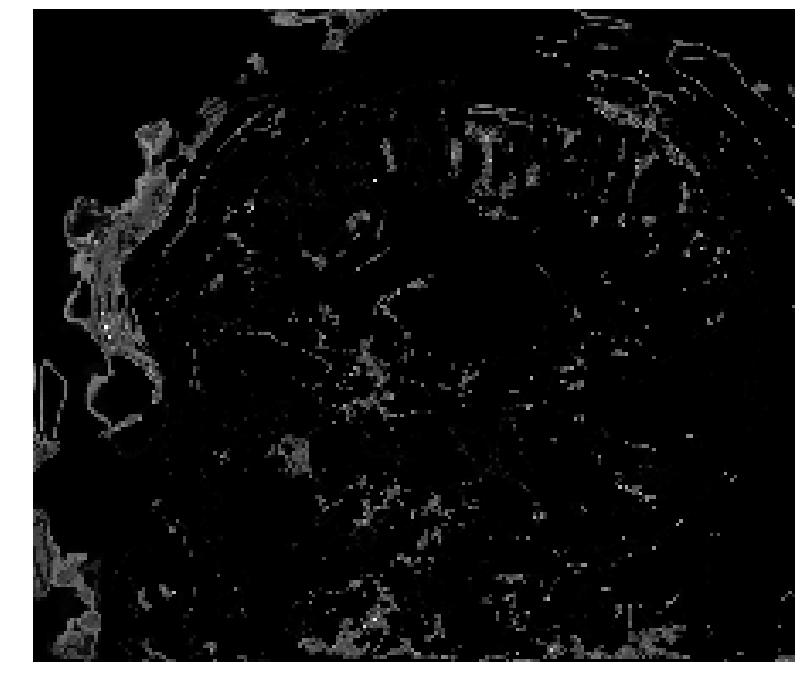

In [54]:
show_img(mov[0, 100, ..., 0])

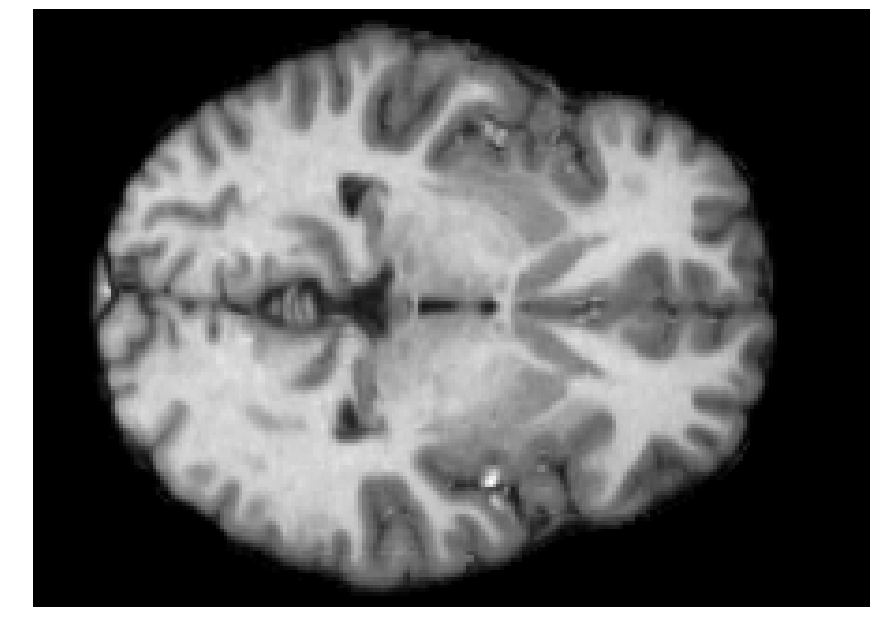

In [60]:
test_vol = np.load('/home/srivathsa/projects/voxelmorph/data/test_vol.npz')

vol = test_vol['vol_data']

show_img(vol[:, 100, :])